In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('uber-3.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df['dropoff_longitude'].isnull().sum()


1

In [5]:
df['dropoff_latitude'].isnull().sum()

1

In [6]:
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df = df.drop(['key','pickup_datetime'],axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_longitude'>

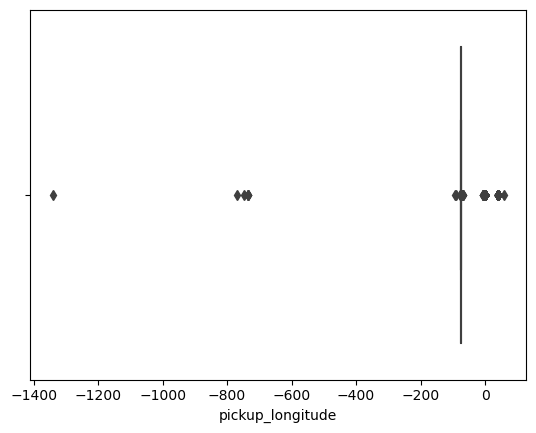

In [9]:
sns.boxplot(df.pickup_longitude)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_latitude'>

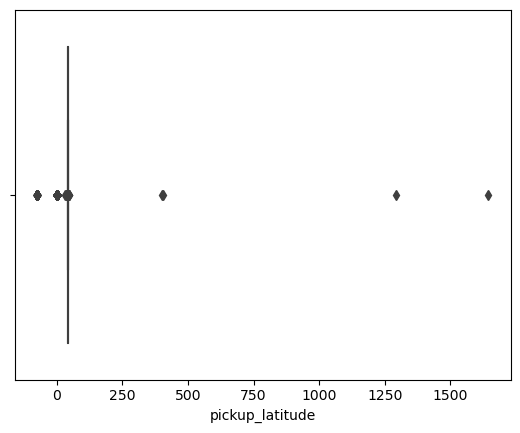

In [10]:
sns.boxplot(df.pickup_latitude)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dropoff_longitude'>

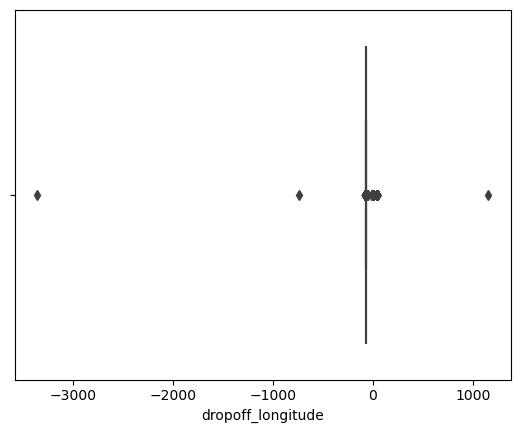

In [11]:
sns.boxplot(df.dropoff_longitude)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dropoff_latitude'>

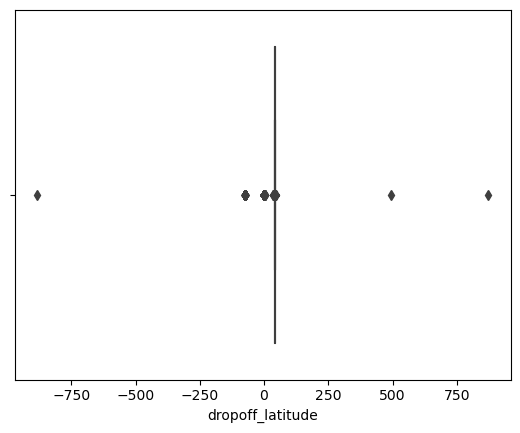

In [12]:
sns.boxplot(df.dropoff_latitude)

<AxesSubplot:>

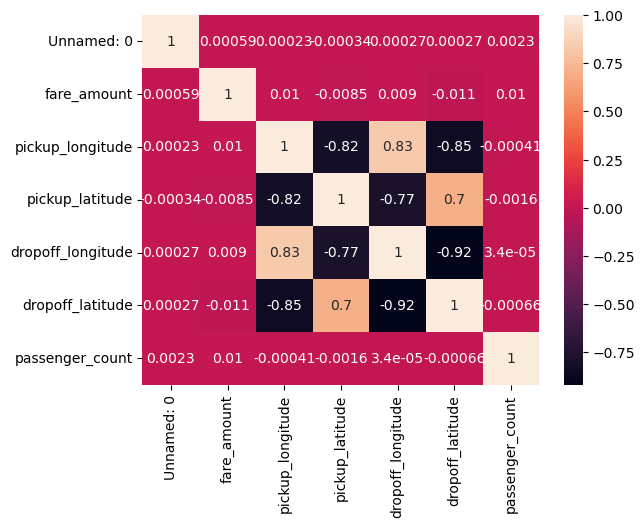

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [14]:
X= df.drop('fare_amount',axis=1)
y= df['fare_amount']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(mse,rmse,mae)

r2_value = r2_score(y_test,y_pred)
print(r2_value)

adj_R2 = 1-((1-r2_value)*(df.shape[0]-1)/df.shape[0]-df.shape[1]-1)
print(adj_R2)

96.93420380722564 9.845516939563186 6.057031675552181
-3.9179779812048565e-05
7.999965820416087


In [17]:
#testing error
y_pred = lr_model.predict(X_test)
mse_test = mean_absolute_error(y_test, y_pred)
mse_test

6.057031675552181

In [18]:
#training error
y_pred_train = lr_model.predict(X_train)
mse_train = mean_absolute_error(y_train, y_pred_train)
mse_train

6.0433786749837575

In [19]:
lasso_model = Lasso(alpha =0.02)
lasso_model

Lasso(alpha=0.02)

In [20]:
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(mse,rmse,mae)

r2_value = r2_score(y_test,y_pred)
print(r2_value)

adj_R2 = 1-((1-r2_value)*(df.shape[0]-1)/df.shape[0]-df.shape[1]-1)
print(adj_R2)

96.93072788101051 9.84534041468402 6.05691135125959
-3.3197606998935925e-06
8.000001680255899


In [22]:
#testing error
y_pred = lasso_model.predict(X_test)
mse_test = mean_absolute_error(y_test, y_pred)
mse_test

6.05691135125959

In [23]:
#training error
y_pred_train = lasso_model.predict(X_train)
mse_train = mean_absolute_error(y_train, y_pred_train)
mse_train

6.043333775594132

In [24]:
ridge_model = Ridge(alpha =0.008)
ridge_model

Ridge(alpha=0.008)

In [25]:
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(mse,rmse,mae)

r2_value = r2_score(y_test,y_pred)
print(r2_value)

adj_R2 = 1-((1-r2_value)*(df.shape[0]-1)/df.shape[0]-df.shape[1]-1)
print(adj_R2)

96.93420380639871 9.845516939521191 6.057031675535383
-3.91797712808728e-05
7.9999658204246185


In [27]:
#testing error
y_pred = ridge_model.predict(X_test)
mse_test = mean_absolute_error(y_test, y_pred)
mse_test

6.057031675535383

In [28]:
#training error
y_pred_train = ridge_model.predict(X_train)
mse_train = mean_absolute_error(y_train, y_pred_train)
mse_train

6.043378674972047